In [3]:
# Implement SVM Classification
    # X = features
    # Y = labels

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [8]:
# Import datasets:

x_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('Y_train.csv', header=None)
x_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('Y_test.csv', header=None)

# verify data:
x_train

,0,1
0,-0.189839,1.050166
1,-0.132564,0.982741
2,-0.394263,1.221791
3,-0.268637,1.249947
4,1.948270,-0.478318
...,...,...
155,1.966937,-0.230039
156,0.919107,0.655677
157,-0.628637,0.402392
158,0.355167,0.562167


In [9]:
# use sklearn.svm.svc to implement SVM classification
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# predict the test data
y_pred = model.predict(x_test)
print(y_pred)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0]
Accuracy: 0.75


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


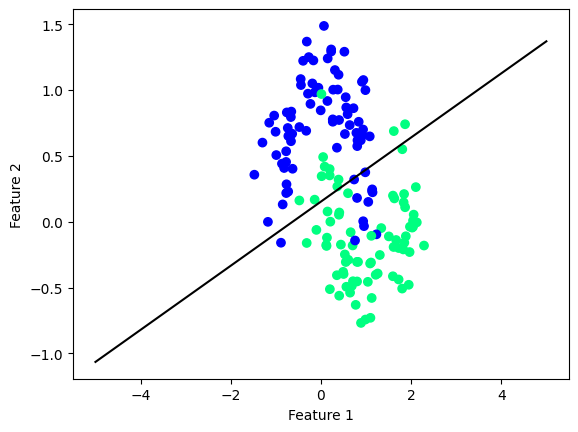

In [10]:
# Plot the data and the decision boundary for linear SVM. 
plt.scatter(x_train[0], x_train[1], c=y_train[0], cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# plot the decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')


In [11]:
def plot_decision_boundary(clf, X, y):
"""
Plots the decision boundary for a given classifier.
Parameters:
clf : trained SVM classifier.
X : numpy array of shape (n_samples, 2). The input feature matrix.
y : numpy array of shape (n_samples,). The target labels.
"""
# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create a grid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(
y_min, y_max, 100))
# Predict class labels for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=’k’, cmap=plt.cm.
coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


SyntaxError: invalid character '’' (U+2019) (3045753430.py, line 20)

Accuracy: 0.925


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'plot_decision_boundary' is not defined

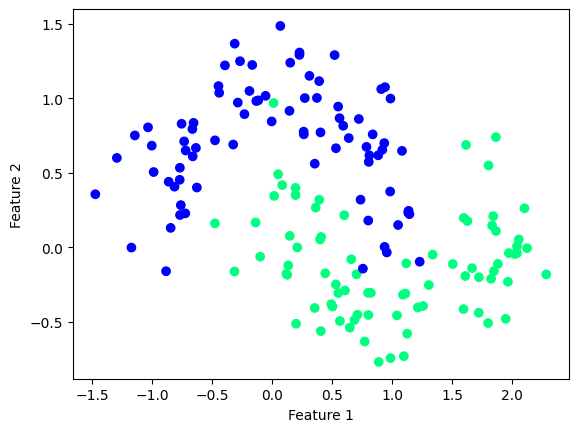

In [12]:
# Change linear kernel to a RBF kernel.
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot the data and the decision boundary for RBF SVM.
plt.scatter(x_train[0], x_train[1], c=y_train[0], cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plot_decision_boundary(model, x_train.values, y_train.values.ravel())
